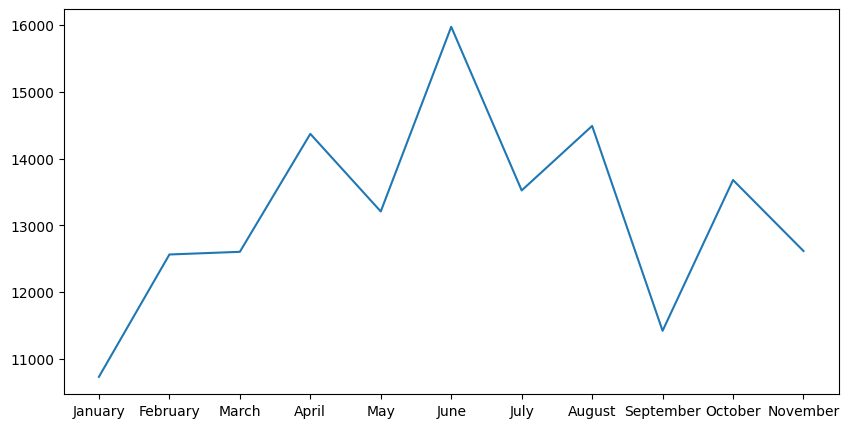

In [15]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

list, months, values = [], [], []

try:
    response = requests.get('https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/opendata.stat')
    for row in response.text.split('\n'):
        if "Средняя пенсия,Забайкальский край,2018" in row:
            list.append(row.strip("Средняя пенсия,Забайкальский край,"))
    for i in list:
        months.extend(i.split(',')[0:1:])
        values.extend(i.split(',')[1::])
    months = [datetime.strptime(month, "%Y-%m-%d").strftime("%B") for month in months]
    values = [int(value) for value in values]
    plt.figure(figsize=(10, 5))
    plt.plot(months, values)
    plt.show()
except requests.ConnectionError:
    raise ConnectionError("Incorrect URL or couldn't connect to this URL")